# Summary     

The goal of this exercise is to predict whether the client will subscribe (yes/no) to a term deposit (that is variable y). I will use 3 algoritms (Logitics Model, Neural Network and Random Forest Model) and find which provides the best results.


## Data

The data I am using is a dataset that describes Portugal bank marketing campaigns results. Conducted campaigns were based mostly on direct phone calls, offering clients to place a term deposit.
Data source: https://www.kaggle.com/volodymyrgavrysh/bank-marketing-campaigns-dataset  

bank client data:       
*1 - age (numeric)

*2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")

*3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

*4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")

5 - default: has credit in default? (categorical: "no","yes","unknown")

6 - housing: has housing loan? (categorical: "no","yes","unknown")

7 - loan: has personal loan? (categorical: "no","yes","unknown")

8 - contact: contact communication type (categorical: "cellular","telephone")

*9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

*10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")

*11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

*12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

*13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

*14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

*16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

*17 - cons.price.idx: consumer price index - monthly indicator (numeric)

*18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

*19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)
Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: "yes","no")
Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques.

Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label. 



In [41]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

import chart_studio.plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go
import math

In [42]:
#https://www.kaggle.com/volodymyrgavrysh/bank-marketing-campaigns-dataset#bank-additional-full.csv
# data = pd.read_csv('[PATH TO YOUR DATA SOURCE]/bankadditionalfull.csv', sep=';', header=0)
data = pd.read_csv('/Users/joao.lopes/Desktop/Dados_Python/CV/Bank/bankadditionalfull.csv', sep=';', header=0)

In [43]:
# showing first 5 rows
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


I decided not use these features because:
- 'campaign' and pdays' change with the time
- 'duration'is not known before a call is performed
- 'nr.employed' I dont understand what is about 

In [44]:
del data['duration']
del data['campaign']
del data['pdays']
del data['nr.employed']

In [45]:
# summarize the number of rows and columns in the dataset
print(data.shape)

(41188, 17)


In [46]:
#Return the dtypes in the dataset
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
y                  object
dtype: object

# Data exploration

In [47]:
#Generate descriptive statistics 
data.describe()

,age,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,0.172963,0.081886,93.575664,-40.502600,3.621291
std,10.42125,0.494901,1.570960,0.578840,4.628198,1.734447
min,17.00000,0.000000,-3.400000,92.201000,-50.800000,0.634000
25%,32.00000,0.000000,-1.800000,93.075000,-42.700000,1.344000
50%,38.00000,0.000000,1.100000,93.749000,-41.800000,4.857000
75%,47.00000,0.000000,1.400000,93.994000,-36.400000,4.961000
max,98.00000,7.000000,1.400000,94.767000,-26.900000,5.045000


In [48]:
data['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [49]:
data.groupby('y').mean()

,age,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
y,,,,,,
no,39.911185,0.132374,0.248875,93.603757,-40.593097,3.811491
yes,40.913147,0.492672,-1.233448,93.354386,-39.789784,2.123135


In [50]:
# Change the column y from yes/no to 1/0
data['Y']=data['y'].map({'yes':1,'no':0})
del data['y']
data['Y'].value_counts()

0    36548
1     4640
Name: Y, dtype: int64

In [51]:
data['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

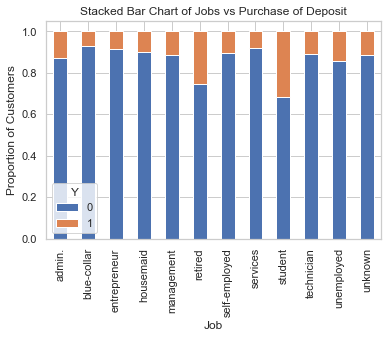

In [52]:
table=pd.crosstab(data.job,data.Y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Jobs vs Purchase of Deposit')
plt.xlabel('Job')
plt.ylabel('Proportion of Customers')
plt.show()

The 'student' and the 'retired' are the classes that most signed the deposit.

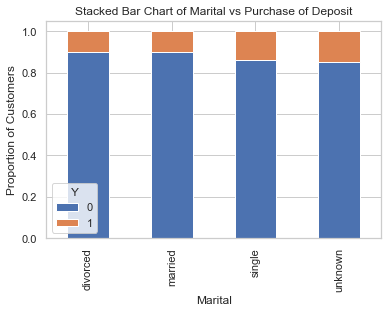

In [53]:
table=pd.crosstab(data.marital,data.Y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital vs Purchase of Deposit')
plt.xlabel('Marital')
plt.ylabel('Proportion of Customers')
plt.show()

The 'single' and the 'unknow' have a slightly higher percentage of deposit subscription compared to other classes

In [54]:
data['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

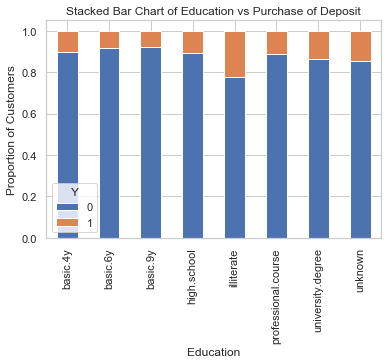

In [55]:
table=pd.crosstab(data.education,data.Y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase of Deposit')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.show()

The 'iliterarte' person buy more the deposit but there are residual

In [56]:
data['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [57]:
# I will join the basic.4Y, basic.6Y and the basic.9Y
data['education']=np.where(data['education'] =='basic.9y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y', 'Basic', data['education'])

In [58]:
data['education'].value_counts()

Basic                  12513
university.degree      12168
high.school             9515
professional.course     5243
unknown                 1731
illiterate                18
Name: education, dtype: int64

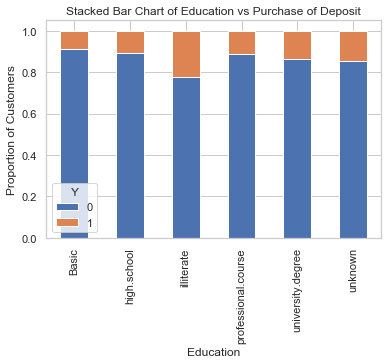

In [59]:
table=pd.crosstab(data.education,data.Y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase of Deposit')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.show()

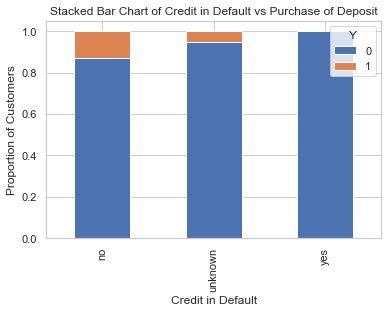

In [60]:
table=pd.crosstab(data.default,data.Y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Credit in Default vs Purchase of Deposit')
plt.xlabel('Credit in Default')
plt.ylabel('Proportion of Customers')
plt.show()

In [61]:
data['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [62]:
# We don't use the default variable because we don't have enough information
del data['default']

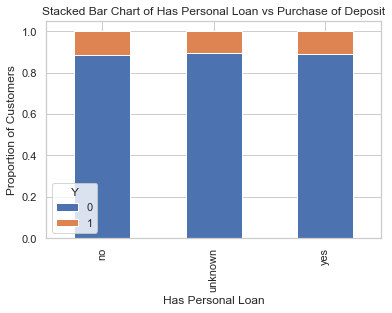

In [63]:
table=pd.crosstab(data.loan,data.Y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Has Personal Loan vs Purchase of Deposit')
plt.xlabel('Has Personal Loan')
plt.ylabel('Proportion of Customers')
plt.show()

The distribution of the purchase of deposits seems to be similar in the different classes of this variable

In [64]:
data['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

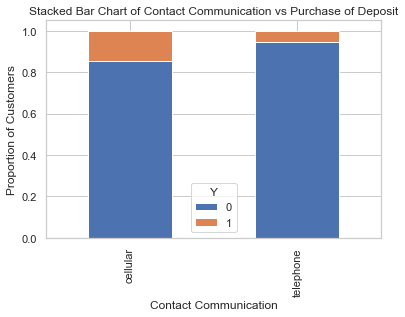

In [65]:
table=pd.crosstab(data.contact,data.Y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Contact Communication vs Purchase of Deposit')
plt.xlabel('Contact Communication')
plt.ylabel('Proportion of Customers')
plt.show()

People that are contact by 'Cellular' more subscristion of deposit than the people contact by 'telephone'

In [66]:
data['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

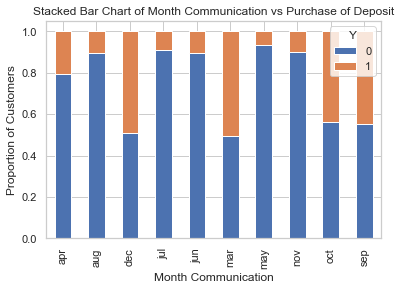

In [67]:
table=pd.crosstab(data.month,data.Y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Month Communication vs Purchase of Deposit')
plt.xlabel('Month Communication')
plt.ylabel('Proportion of Customers')
plt.show()

'oct', 'sep', 'mar', 'dec' are the months that have more deposit subscriptions but are the months where there are less contacts, so I will join this 4 months in one classe named 'Other'

In [68]:
data['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [69]:
#I will join the months Oct, Sep, Mar and Dec in a classe Other
data['month']=np.where(data['month'] =='oct', 'Other', data['month'])
data['month']=np.where(data['month'] =='sep', 'Other', data['month'])
data['month']=np.where(data['month'] =='mar', 'Other', data['month'])
data['month']=np.where(data['month'] =='dec', 'Other', data['month'])

In [70]:
data['month'].value_counts()

may      13769
jul       7174
aug       6178
jun       5318
nov       4101
apr       2632
Other     2016
Name: month, dtype: int64

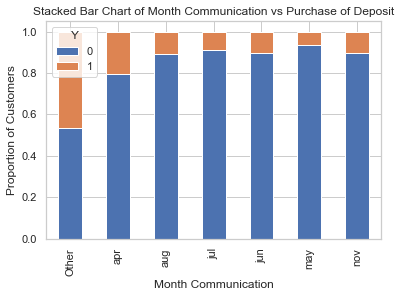

In [71]:
table=pd.crosstab(data.month,data.Y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Month Communication vs Purchase of Deposit')
plt.xlabel('Month Communication')
plt.ylabel('Proportion of Customers')
plt.show()

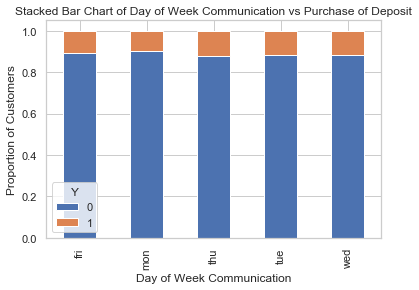

In [72]:
table=pd.crosstab(data.day_of_week,data.Y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Day of Week Communication vs Purchase of Deposit')
plt.xlabel('Day of Week Communication')
plt.ylabel('Proportion of Customers')
plt.show()

The distribution of the purchase of deposits seems to be similar in the different classes of this variable

In [73]:
data['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

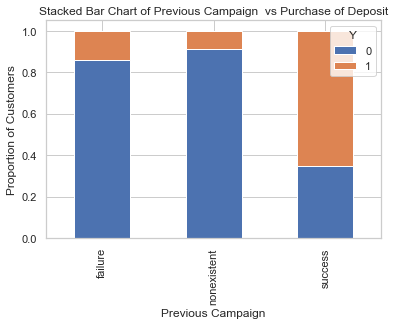

In [74]:
table=pd.crosstab(data.poutcome,data.Y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Previous Campaign  vs Purchase of Deposit')
plt.xlabel('Previous Campaign')
plt.ylabel('Proportion of Customers')
plt.show()

People that buy some product in the previous marketing campaign have a high percentage of deposit sign-up

In [75]:
data['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

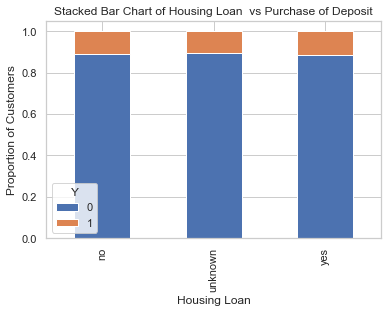

In [76]:
table=pd.crosstab(data.housing,data.Y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Housing Loan  vs Purchase of Deposit')
plt.xlabel('Housing Loan')
plt.ylabel('Proportion of Customers')
plt.show()

The distribution of the purchase of deposits seems to be similar in the different classes of this variable

In [77]:
data['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

# Create dummy variables

In [78]:
cat_vars=['job','marital','education','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1

In [79]:
cat_vars=['job','marital','education','housing','loan','contact','month','day_of_week','poutcome']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [80]:
data_final=data[to_keep]
data_final.columns.values

array(['age', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'Y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management',
       'job_retired', 'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'housing_no',
       'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown',
       'loan_yes', 'contact_cellular', 'contact_telephone', 'month_Other',
       'month_apr', 'month_aug', 'month_jul', 'month_jun', 'month_may',
       'month_nov', 'day_of_week_fri', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_failure', 'poutcome_nonexistent', 'poutcome_su

In [81]:
data_final_vars=data_final.columns.values.tolist()

In [82]:
X=data_final[data_final_vars]
del X['Y']
y=data_final['Y']

# Train/Test Split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Logitics Model
### Feature Selection

I will use two methods feature selection:        
1- SelectKBest        
2- RFE

In [84]:
#1- SelectKBest 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X_train)
chi_selector = SelectKBest(chi2, k=20)
chi_selector.fit(X_norm, y_train)
chi_support = chi_selector.get_support()
chi_feature = X_train.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

20 selected features


In [85]:
chi_feature

['previous',
 'emp.var.rate',
 'cons.price.idx',
 'euribor3m',
 'job_blue-collar',
 'job_retired',
 'job_services',
 'job_student',
 'marital_single',
 'education_Basic',
 'education_university.degree',
 'contact_cellular',
 'contact_telephone',
 'month_Other',
 'month_apr',
 'month_jul',
 'month_may',
 'poutcome_failure',
 'poutcome_nonexistent',
 'poutcome_success']

In [86]:
cols=['previous',
 'emp.var.rate',
 'cons.price.idx',
 'euribor3m',
 'job_blue-collar',
 'job_retired',
 'job_services',
 'job_student',
 'marital_single',
 'education_Basic',
 'education_university.degree',
 'contact_cellular',
 'contact_telephone',
 'month_Other',
 'month_apr',
 'month_jul',
 'month_may',
 'poutcome_failure',
 'poutcome_nonexistent',
 'poutcome_success']
X_train=X_train[cols]


In [87]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.280130
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      Y   No. Observations:                28831
Model:                          Logit   Df Residuals:                    28812
Method:                           MLE   Df Model:                           18
Date:                Wed, 12 Feb 2020   Pseudo R-squ.:                  0.2049
Time:                        21:07:38   Log-Likelihood:                -8076.4
converged:                       True   LL-Null:                       -10158.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
previous                        0.0731      0.063      1.170      0.242   

I will drop the variable previous,marital_single, education_Basic, education_university.degree,contact_cellular, contact_telephone,month_apr, poutcome_failure, poutcome_nonexistent, poutcome_success because the P>|z| is >0.05  therefore, these variables are not significant to the model.

In [88]:
cols=[
 'emp.var.rate',
 'cons.price.idx',
 'job_blue-collar',
 'job_retired',
 'job_services',
 'job_student',
 'month_Other',
 'month_jul',
 'month_may']
X_train=X_train[cols]


In [89]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.297380
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      Y   No. Observations:                28831
Model:                          Logit   Df Residuals:                    28822
Method:                           MLE   Df Model:                            8
Date:                Wed, 12 Feb 2020   Pseudo R-squ.:                  0.1559
Time:                        21:07:38   Log-Likelihood:                -8573.8
converged:                       True   LL-Null:                       -10158.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
emp.var.rate       -0.5196      0.014    -37.878      0.000      -0.547      -0.493
cons.price.idx

In [90]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [91]:
cols=[
 'emp.var.rate',
 'cons.price.idx',
 'job_blue-collar',
 'job_retired',
 'job_services',
 'job_student',
 'month_Other',
 'month_jul',
 'month_may']
X_test=X_test[cols]

In [92]:
y_pred = logreg.predict(X_test)

In [93]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))


Accuracy of logistic regression classifier on test set: 0.88


In [94]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increas

10-fold cross validation average accuracy: 0.884


/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [95]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[10810   159]
 [ 1264   124]]


In [96]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     10969
           1       0.44      0.09      0.15      1388

    accuracy                           0.88     12357
   macro avg       0.67      0.54      0.54     12357
weighted avg       0.84      0.88      0.85     12357



In [97]:
# I will try find an optimum cut-off point
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])


def Find_Optimal_Cutoff(target, predicted):

    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.loc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold']) 

X_test['pred'] = result.predict(X_test)
# Find optimal probability threshold
threshold = Find_Optimal_Cutoff(y_test, X_test['pred'])
print (threshold)

# Find prediction to the dataframe applying threshold
X_test['pred_y'] = X_test['pred'].map(lambda x: 1 if x > float(np.asarray(threshold)) else 0)

# Print confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, X_test['pred_y'])

[0.10456680437841448]


array([[8597, 2372],
       [ 464,  924]])

In [98]:
from sklearn.metrics import classification_report
print(classification_report(y_test, X_test['pred_y']))

              precision    recall  f1-score   support

           0       0.95      0.78      0.86     10969
           1       0.28      0.67      0.39      1388

    accuracy                           0.77     12357
   macro avg       0.61      0.72      0.63     12357
weighted avg       0.87      0.77      0.81     12357



In [99]:
#2- RFE

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [101]:
X_norm = MinMaxScaler().fit_transform(X_train)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=20, step=10, verbose=5)
rfe_selector.fit(X_norm, y_train)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')
rfe_feature

Fitting estimator with 51 features.


/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Fitting estimator with 41 features.
Fitting estimator with 31 features.

/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression




Fitting estimator with 21 features.
20 selected features


/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



['previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'job_blue-collar',
 'job_retired',
 'job_student',
 'job_unknown',
 'marital_unknown',
 'education_illiterate',
 'contact_cellular',
 'contact_telephone',
 'month_Other',
 'month_aug',
 'month_jul',
 'month_may',
 'day_of_week_mon',
 'poutcome_failure',
 'poutcome_nonexistent',
 'poutcome_success']

In [102]:
cols=['previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'job_blue-collar',
 'job_retired',
 'job_student',
 'job_unknown',
 'marital_unknown',
 'education_illiterate',
 'contact_cellular',
 'contact_telephone',
 'month_Other',
 'month_aug',
 'month_jul',
 'month_may',
 'day_of_week_mon',
 'poutcome_failure',
 'poutcome_nonexistent',
 'poutcome_success']
X_train=X_train[cols]

In [103]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.278665
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                      Y   No. Observations:                28831
Model:                          Logit   Df Residuals:                    28812
Method:                           MLE   Df Model:                           18
Date:                Wed, 12 Feb 2020   Pseudo R-squ.:                  0.2091
Time:                        21:07:41   Log-Likelihood:                -8034.2
converged:                       True   LL-Null:                       -10158.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
previous                 0.0171      0.062      0.274      0.784      -0.105       0.14

In [104]:
cols=[
 'emp.var.rate',
 'cons.price.idx',
 'job_blue-collar',
 'job_retired',
 'job_student',
 'month_Other',
 'month_aug',
 'month_jul',
 'month_may',
 'day_of_week_mon']
X_train=X_train[cols]

In [105]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.297026
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      Y   No. Observations:                28831
Model:                          Logit   Df Residuals:                    28821
Method:                           MLE   Df Model:                            9
Date:                Wed, 12 Feb 2020   Pseudo R-squ.:                  0.1569
Time:                        21:07:41   Log-Likelihood:                -8563.6
converged:                       True   LL-Null:                       -10158.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
emp.var.rate       -0.5286      0.014    -38.222      0.000      -0.556      -0.501
cons.price.idx

In [106]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [107]:
cols=[
 'emp.var.rate',
 'cons.price.idx',
 'job_blue-collar',
 'job_retired',
 'job_student',
 'month_Other',
 'month_aug',
 'month_jul',
 'month_may',
 'day_of_week_mon']
X_test=X_test[cols]

In [108]:
X_test

,emp.var.rate,cons.price.idx,job_blue-collar,job_retired,job_student,month_Other,month_aug,month_jul,month_may,day_of_week_mon
15500,1.4,93.918,1,0,0,0,0,1,0,0
29034,-1.8,93.075,1,0,0,0,0,0,0,0
11199,1.4,94.465,1,0,0,0,0,0,0,0
22247,1.4,93.444,0,0,0,0,1,0,0,0
27180,-0.1,93.200,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
20920,1.4,93.444,0,0,0,0,1,0,0,0
15744,1.4,93.918,0,0,0,0,0,1,0,1
34965,-1.8,92.893,0,0,0,0,0,0,1,0
4644,1.1,93.994,0,0,0,0,0,0,1,0


In [109]:
y_pred = logreg.predict(X_test)

In [110]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))


Accuracy of logistic regression classifier on test set: 0.88


In [111]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increas

10-fold cross validation average accuracy: 0.883


/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [112]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[10801   168]
 [ 1258   130]]


In [113]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     10969
           1       0.44      0.09      0.15      1388

    accuracy                           0.88     12357
   macro avg       0.67      0.54      0.55     12357
weighted avg       0.84      0.88      0.85     12357



In [114]:
# I will try find an optimum cut-off point
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])


def Find_Optimal_Cutoff(target, predicted):

    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.loc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold']) 

X_test['pred'] = result.predict(X_test)
# Find optimal probability threshold
threshold = Find_Optimal_Cutoff(y_test, X_test['pred'])
print (threshold)

# Find prediction to the dataframe applying threshold
X_test['pred_y'] = X_test['pred'].map(lambda x: 1 if x > float(np.asarray(threshold)) else 0)

# Print confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, X_test['pred_y'])

[0.10078652516962949]


array([[8392, 2577],
       [ 446,  942]])

In [115]:
from sklearn.metrics import classification_report
print(classification_report(y_test, X_test['pred_y']))

              precision    recall  f1-score   support

           0       0.95      0.77      0.85     10969
           1       0.27      0.68      0.38      1388

    accuracy                           0.76     12357
   macro avg       0.61      0.72      0.62     12357
weighted avg       0.87      0.76      0.80     12357



In [116]:
print(X.shape)

(41188, 51)


# Neural Network

In [117]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

cols=['previous',
 'emp.var.rate',
 'cons.price.idx',
 'euribor3m',
 'job_blue-collar',
 'job_retired',
 'job_services',
 'job_student',
 'marital_single',
 'education_Basic',
 'education_university.degree',
 'contact_cellular',
 'contact_telephone',
 'month_Other',
 'month_apr',
 'month_jul',
 'month_may',
 'poutcome_failure',
 'poutcome_nonexistent',
 'poutcome_success']
X_train=X_train[cols]
X_test=X_test[cols]

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(20,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

NN=model.fit(X_train, y_train, epochs=5, batch_size=1)

test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Train on 28831 samples
Epoch 1/5
28831/28831 [==============================] - 58s 2ms/sample - loss: 0.3069 - accuracy: 0.8911
Epoch 2/5
28831/28831 [==============================] - 56s 2ms/sample - loss: 0.2892 - accuracy: 0.8956
Epoch 3/5
28831/28831 [==============================] - 52s 2ms/sample - loss: 0.2873 - accuracy: 0.8972
Epoch 4/5
28831/28831 [==============================] - 56s 2ms/sample - loss: 0.2841 - accuracy: 0.8979
Epoch 5/5
12357/12357 [==============================] - 0s 40us/sample - loss: 0.2927 - accuracy: 0.8982
Test accuracy: 0.8981953


In [118]:
X_test['pred'] = model.predict(X_test)

In [119]:
def Find_Optimal_Cutoff(target, predicted):

    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.loc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold']) 


# Find optimal probability threshold
threshold = Find_Optimal_Cutoff(y_test, X_test['pred'])
print (threshold)

# Find prediction to the dataframe applying threshold
X_test['pred_y'] = X_test['pred'].map(lambda x: 1 if x > float(np.asarray(threshold)) else 0)

# Print confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, X_test['pred_y'])


[0.04288330674171448]


array([[7884, 3085],
       [ 391,  997]])

In [120]:
from sklearn.metrics import classification_report
print(classification_report(y_test, X_test['pred_y']))

              precision    recall  f1-score   support

           0       0.95      0.72      0.82     10969
           1       0.24      0.72      0.36      1388

    accuracy                           0.72     12357
   macro avg       0.60      0.72      0.59     12357
weighted avg       0.87      0.72      0.77     12357



# Random Forest Model

In [121]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#Create a Gaussian Classifier
rlf=RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
rlf.fit(X_train,y_train)

y_pred=rlf.predict(X_test)

In [122]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.887836853605244


In [123]:
import pandas as pd
feature_imp = pd.Series(rlf.feature_importances_,index=X_train.columns.values).sort_values(ascending=False)
feature_imp

age                              0.221013
euribor3m                        0.145051
poutcome_success                 0.042408
cons.conf.idx                    0.037104
emp.var.rate                     0.035727
cons.price.idx                   0.031389
housing_yes                      0.022709
housing_no                       0.022416
previous                         0.021897
month_Other                      0.020367
education_university.degree      0.018564
job_admin.                       0.018181
marital_married                  0.017750
education_high.school            0.017748
day_of_week_mon                  0.016230
day_of_week_thu                  0.015961
loan_no                          0.015922
day_of_week_wed                  0.015871
loan_yes                         0.015456
marital_single                   0.015455
day_of_week_tue                  0.015163
education_Basic                  0.015115
job_technician                   0.014924
day_of_week_fri                  0

In [124]:

X_test['pred_y'] = rlf.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, X_test['pred_y'])

/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([[10573,   396],
       [  990,   398]])

In [125]:
from sklearn.metrics import classification_report
print(classification_report(y_test, X_test['pred_y']))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94     10969
           1       0.50      0.29      0.36      1388

    accuracy                           0.89     12357
   macro avg       0.71      0.63      0.65     12357
weighted avg       0.87      0.89      0.87     12357



In [126]:
del X_test['pred_y']
X_test['pred'] = rlf.predict_proba(X_test)[:,1]

/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [127]:
def Find_Optimal_Cutoff(target, predicted):

    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.loc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold']) 


# Find optimal probability threshold
threshold = Find_Optimal_Cutoff(y_test, X_test['pred'])
print (threshold)

# Find prediction to the dataframe applying threshold
X_test['pred_y'] = X_test['pred'].map(lambda x: 1 if x > float(np.asarray(threshold)) else 0)

# Print confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, X_test['pred_y'])

[0.07]


/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([[7879, 3090],
       [ 420,  968]])

In [128]:
print(classification_report(y_test, X_test['pred_y']))

              precision    recall  f1-score   support

           0       0.95      0.72      0.82     10969
           1       0.24      0.70      0.36      1388

    accuracy                           0.72     12357
   macro avg       0.59      0.71      0.59     12357
weighted avg       0.87      0.72      0.77     12357



# Conclusion

The 3 models have similar results.

We need to know more about the cost of contacting a person to decide which model to use.